## <span style='color:blue'>***Necessary Libraries***</span>

In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(rc={
    'figure.figsize':(25, 20)
})

np.random.seed(100)

Wall time: 735 ms


## <span style='color:blue'>***Data Loading***</span>

In [2]:
df=pd.read_csv(r'D:\Download\merged_data.csv')
df.shape

(58478, 8)

In [3]:
df.tail()

,articleID,domain,date,category,headline,content,label,target
58473,1303,bengalbeats.com,2019-03-31T21:34:42+00:00,Miscellaneous,রাজশাহীতে স্বামীর হাঁচির আওয়াজে ঘুমের মধ্যেই স...,রাজশাহীর সাহেব বাজার মোড়ে রাতে ঘুমের মধ্যে হাস...,0.0,Fake
58474,1304,bengaliviralnews.com,2018-01-16T15:36:12+00:00,Miscellaneous,IAS ইন্টারভিউ এ মেয়েটিকে জিজ্ঞসা করা হল মেয়েদে...,IAS পরীক্ষায় এমন এমন অবাক করে দেওয়া প্রশ্ন এসে...,0.0,Fake
58475,1305,channeldhaka.news,2018-12-03T18:09:08+00:00,Crime,শাওমি মোবাইল বিস্ফোরণে কলেজছাত্রের মৃত্যু!,শাওমি মোবাইল ফোন বিস্ফোরণ হয়ে স্বপ্নীল মজুমদা...,0.0,Fake
58476,1306,earki.com,"১৭:৩৬, জানুয়ারি ০৭, ২০১৯",Miscellaneous,ফেসবুকে যেভাবে নতুন মন্ত্রীদের অভিনন্দন বার্তা...,আপনাকে নতুন মন্ত্রিসভার সদস্যদের অভিনন্দন জানা...,0.0,Fake
58477,1307,channeldhaka.news,2019-03-09T23:00:05+00:00,International,মাঝ আকাশে পর্ন দেখার অভিযোগে পাইলট আটক!,বিমান যখন আকাশে তখন আর কোনও দিকে খেয়াল না রেখ...,0.0,Fake


## <span style='color:blue'>***Separating the Fake and Real News Data***</span>

In [4]:
fake=df[df['target']=='Fake']
real=df[df['target']=='Real']

fake.reset_index(inplace=True, drop=True)
real.reset_index(inplace=True, drop=True)

## <span style='color:blue'>***Data Preprocessing***</span>

In [5]:
%%time
import nltk
import re
from bnlp.corpus import stopwords
from bnltk.tokenize import Tokenizers

Wall time: 675 ms


In [6]:
t=Tokenizers()
def preprocess(data):
    """This function is for preprocessing of the news contents. It removes punctuations, English characters and both of Bangla
    and English numerals. It tokenizes all the words and also removes stopwords.
    
    Args: 
        The Entire Dataframe
    Returns:
        Preprocessed news corpuses in a list of lists
    """
    corpus=[]
    for i in range(0, len(data)):
        x=re.sub('[^\u0980-\u09FF]',' ',data['content'][i])
        x=re.sub('[a-zA-Z0-9]+', ' ', x)
        x=re.sub('[০১২৩৪৫৬৭৮৯]+', ' ', x)
        x=t.bn_word_tokenizer(x)
        x=[w for w in x if w not in set(stopwords)]
        
        corpus.append(x)
    
    return corpus

### <span style='color:red'>Fake Data Preprocessing</span>

In [7]:
corpus_fake=preprocess(fake)

In [8]:
corpus_fake[2:3]

[['অদ্ভুত',
  'বিরোধীদলহীনতায়',
  'ভুগছে',
  'সরকার',
  'এক',
  'অন্যরকম',
  'শূন্যতা',
  'বাবা',
  'মায়ের',
  'সাথে',
  'আজকালকার',
  'ছেলেমেয়েরা',
  'একাকীত্বে',
  'ভোগে',
  'তেমনি',
  'সবকিছু',
  'বেষ্টিত',
  'থাকলেও',
  'বর্তমান',
  'সরকারের',
  'পাশে',
  'প্রচন্ড',
  'অনিচ্ছায়',
  'জাতীয়পার্টি',
  'বিরোধীদলের',
  'চেয়ারে',
  'বসলেও',
  'বিরোধীদল',
  'অনেকটা',
  'বিরোধীদলের',
  'রেপ্লিকার',
  'মত',
  'এমতাবস্থায়',
  'সরকারকে',
  'বিরোধীদল',
  'আমদানির',
  'পরামর্শ',
  'দিয়েছেন',
  'অনলাইন',
  'রাজনীতি',
  'বিশেষজ্ঞরা',
  'নাম',
  'প্রকাশে',
  'অনিচ্ছুক',
  'জনৈক',
  'বিরোধীদল',
  'বিশেষজ্ঞ',
  'বর্তমান',
  'সরকারের',
  'একটা',
  'জিনিসেরই',
  'অভাব',
  'উন্নতমানের',
  'বিরোধীদল',
  'অতিসত্ত্বর',
  'পদক্ষেপ',
  'নেয়া',
  'দেশে',
  'পাওয়া',
  'বিদেশ',
  'উন্নতমানের',
  'বিরোধীদল',
  'আনাতে',
  'আলীবাবা',
  'অ্যামাজন',
  'অর্ডার',
  'বিরোধীদল',
  'আনানো',
  'কিনা',
  'প্রশ্নে',
  'বিশেষজ্ঞ',
  'চোখ',
  'কপালে',
  'না৷',
  'অনলাইনে',
  'অর্ডার',
  'কখনোই',
  'ভাল',
  'মাল',
  'পাওয়া',


In [9]:
type(corpus_fake)

list

### <span style='color:red'>Real Data Preprocessing</span>

In [10]:
%%time
corpus_real=preprocess(real)

Wall time: 2min 25s


In [11]:
corpus_real[6:7]

[['শ্রমিক',
  'কর্মচারীদের',
  'ব্যবস্থাপনায়',
  'হস্তান্তরিত',
  'বস্ত্রকলগুলো',
  'সুষ্ঠু',
  'পরিচালনার',
  'সরকারের',
  'সহায়তা',
  'চেয়েছেন',
  'মিলগুলোর',
  'সমন্বয়',
  'পরিষদ',
  'বুধবার',
  'শিল্প',
  'মন্ত্রণালয়ে',
  'শিল্পমন্ত্রী',
  'আমির',
  'হোসেন',
  'আমুর',
  'বৈঠকের',
  'সময়',
  'সহায়তা',
  'হস্তান্তরিত',
  'বস্ত্র',
  'মিলস',
  'সমন্বয়',
  'পরিষদের',
  'নেতারা',
  'এগুলো',
  'সুষ্ঠু',
  'পরিচালনার',
  'স্বার্থে',
  'সালের',
  'অক্টোবরে',
  'বস্ত্র',
  'পাট',
  'মন্ত্রণালয়',
  'পরিদর্শনকালে',
  'প্রধানমন্ত্রীর',
  'দেয়া',
  'নির্দেশনা',
  'দ্রুত',
  'বাস্তবায়নের',
  'দাবি',
  'জানিয়েছেন',
  'বৈঠকে',
  'হস্তান্তরিত',
  'বস্ত্রকলগুলোর',
  'বর্তমান',
  'সমস্যা',
  'সমাধানের',
  'উপায়',
  'আলোচনা',
  'সময়',
  'পরিষদের',
  'নেতারা',
  'উন্নত',
  'ব্যবস্থাপনার',
  'প্রধানমন্ত্রী',
  'শেখ',
  'হাসিনার',
  'নির্দেশনায়',
  'সালে',
  'মার্চ',
  'নয়টি',
  'বস্ত্রকল',
  'শ্রমিক',
  'কর্মচারীদের',
  'মালিকানায়',
  'হস্তান্তর',
  'হয়েছিল',
  'পরবর্তীতে',
  'বিএনপি',
  'জামায়াত',
  'স

## <span style='color:blue'>***Word Embedding***</span>

In [12]:
%%time
from gensim.models import Word2Vec

Wall time: 0 ns


In [13]:
def word_embedding(corpus):
    """This function is for word embedding of the news corpuses. It uses word to vectorizer method to do it.
    
    Args:
       News Corpuses
    Returns:
        A dataframe which contains words and their vectors
    """
    mymodel=Word2Vec(corpus)
    words=list(mymodel.wv.vocab)
    vector_list=[mymodel[word] for word in words if word in mymodel.wv.vocab]
    words_filtered=[word for word in words if word in mymodel.wv.vocab]
    word_vec_zip=zip(words_filtered, vector_list)
    word_vec_dict=dict(word_vec_zip)
    df=pd.DataFrame.from_dict(word_vec_dict, orient='index')
    df=df.T
    return df

### <span style='color:red'>Fake Data Word Embedding</span>

In [14]:
df_fake=word_embedding(corpus_fake)
df_fake.head()

,বাংলায়,একটা,প্রবাদ,মুরগী,এজন্য,কাজই,খেয়ে,ফেলা,কখনো,নিজেকে,...,রাব্বানী,সাঙ্গাকারা,সাঙ্গাকারার,শন,পোলক,শেহজাদ,যানজটে,হাঁচির,এতোটুকু,ব্যুরো
0,-0.187321,-0.985665,-0.054997,-0.149646,-0.491200,-0.091670,-0.766600,-0.386358,-0.779553,-0.487041,...,-0.024556,-0.117207,-0.089152,-0.063676,-0.147490,-0.068838,-0.039252,-0.072456,-0.041044,-0.027765
1,0.304126,0.870725,0.103273,0.262165,0.727743,0.138218,0.754435,0.559248,0.802599,0.841206,...,0.050250,0.207843,0.139385,0.090576,0.230405,0.111944,0.061087,0.121929,0.059854,0.064576
2,-0.099075,-0.005885,-0.034560,-0.089994,-0.201475,-0.034993,-0.170446,-0.182301,-0.134846,-0.219360,...,-0.014776,-0.064854,-0.053565,-0.034808,-0.074607,-0.028057,-0.026796,-0.028623,-0.021079,-0.026512
3,-0.007347,-0.319148,0.001941,-0.002563,-0.071186,-0.015239,-0.205281,-0.048048,-0.257124,-0.071086,...,0.002272,-0.003971,-0.006187,-0.001789,-0.015827,-0.008536,0.001320,-0.004595,-0.003361,0.004716
4,-0.060574,0.387581,-0.025834,-0.061587,-0.082644,-0.017514,0.054746,-0.086347,0.170848,-0.115297,...,-0.009583,-0.039536,-0.029589,-0.023683,-0.033913,-0.014522,-0.017270,-0.015996,-0.005866,-0.023080


### <span style='color:red'>Real Data Word Embedding</span>

In [15]:
%%time
df_real=word_embedding(corpus_real)
df_real.head()

Wall time: 51.4 s


,গত,সেপ্টেম্বর,বাংলাদেশ,কৃষি,বিশ্ববিদ্যালয়ে,বাকৃবি,উপাচার্যের,কার্যালয়ে,হট্টগোলের,ঘটনায়,...,জেএমবিসহ,নেছারের,ব্রাউনিয়াসহ,গোদাগাড়ী,স্বর্ণকিশোরী,দেউজি,স্নোটেক্স,স্নোটেক্সের,কুশান,ফরাজীকান্দি
0,1.035325,-0.934801,3.491155,-2.154520,-2.766747,0.691137,-0.716313,-2.790473,-0.116496,-1.144709,...,0.045328,-0.039650,0.076879,-0.071303,0.007985,0.021079,-0.079317,-0.113788,-0.092501,-0.048425
1,3.812520,-1.039648,-2.882636,1.011829,-0.134648,-0.051734,-0.163347,2.597993,0.011747,2.779092,...,0.196742,0.073647,-0.004923,0.058251,0.044124,0.000304,0.026017,0.044939,-0.062584,0.070285
2,0.229491,-1.999244,0.237239,0.202007,-0.848373,0.113471,1.122534,-0.693056,0.145516,-2.479357,...,0.072596,-0.070496,0.084146,0.091578,-0.049864,-0.159484,-0.036155,-0.020782,0.008299,0.041721
3,0.836574,1.151661,-1.441676,1.195922,-2.738040,0.326136,-0.164588,1.909067,-0.182683,-0.178863,...,-0.052532,-0.000026,-0.106837,0.009650,0.027018,-0.052065,0.010263,-0.005052,0.047542,-0.001792
4,-2.301868,2.602283,3.740605,-0.352037,-0.597476,0.400448,0.385175,-0.497831,-0.093079,2.861171,...,0.056456,-0.031069,0.116525,-0.016298,0.019538,-0.032212,0.025252,0.009951,0.071466,0.023489


In [16]:
df_fake.shape, df_real.shape

((100, 14529), (100, 78251))

## <span style='color:blue'>***Data Splitting***</span>

In [17]:
def Xy_split(df):
    """This function splits the data into dependent(X) and independent features(y)
    
    Args:
        The Entire Dataframe
    Returns:
        X and y in numpy arrays
    """
    cols=df.columns
    y=np.ones(len(df), dtype=int)
    X=df[cols].values
    
    return X, y

### <span style='color:red'>Fake Data Splitting</span>

In [18]:
X_fake, y_fake=Xy_split(df_fake)
X_fake.shape, y_fake.shape

((100, 14529), (100,))

### <span style='color:red'>Real Data Splitting</span>

In [19]:
X_real, y_real=Xy_split(df_real)
X_real.shape, y_real.shape

((100, 78251), (100,))

## <span style='color:blue'>Identifying Key Features for Fake and Real News</span>

In [20]:
%%time
from sklearn.feature_selection import mutual_info_classif, SelectKBest

Wall time: 23.9 ms


### <span style='color:orange'>***Using Mutual Information Classifier***</span>

In [21]:
def feature_identification_mutual_info(X, y, df, top):
    """This function identifies the top important features of both fake and real news from news contents. It uses mutual information
    classifier to do this.
    
    Args:
        X, y:Dependent(X) and Independent Features(y)
        df, top: The Entire Dataframe and top n Numbers of Feature
    Returns:
        Top features
    """
    features=mutual_info_classif(X, y)
    features=pd.Series(features)
    features.index=df.columns
    return features.sort_values(ascending=False).head(top)

### <span style='color:red'>Fake Top 20 Features</span>

In [22]:
fake_features_top20=feature_identification_mutual_info(X_fake, y_fake, df_fake, top=20)
fake_features_top20

ব্যুরো       0
ক্লাসে       0
পতাকা        0
থাকাই        0
কেন্দ্রের    0
আসায়         0
টেনশনে       0
ভাববেন       0
ভোটের        0
দলই          0
হাসাহাসি     0
সদস্যরা      0
হেরে         0
তাকেই        0
আদেশ         0
টিপস         0
সেসব         0
থাক          0
গতবারের      0
যুগান্তর     0
dtype: int32

### <span style='color:red'>Real Top 20 Features</span>

In [23]:
%%time
real_features_top20=feature_identification_mutual_info(X_real, y_real, df_real, top=20)
real_features_top20

Wall time: 1min 24s


ফরাজীকান্দি    0
সিরিয়াল        0
সিজন           0
দেবদাস         0
তুমসে          0
কৌন            0
ইন্সটাগ্রাম    0
মুম্বাইয়ের     0
শতাব্দীর       0
পারোসন         0
ব্যাপকহারে     0
হাসরাতেঁ       0
দেউলের         0
পেয়ার          0
কোই            0
নাহি           0
কাউচে          0
সিদ্ধি         0
বাপ            0
ফিল্মি         0
dtype: int32

### <span style='color:orange'>***Using Select K Best Method with Mutual Information Classifier***</span>

In [24]:
def feature_identification_k_best(X, y, df, k):
    """This function identifies the top important features of both fake and real news from news contents. It selects k best
    features with mutual information classifier to do this.
    
    Args:
        X, y:Dependent(X) and Independent Features(y)
        df, k: The Entire Dataframe and top k Features
    Returns:
        Top k features
    """
    features=SelectKBest(mutual_info_classif, k=k)
    features.fit(X, y)
    return df.columns[features.get_support()]

### <span style='color:red'>Fake Top 20 Features</span>

In [25]:
fake_features_top20=feature_identification_k_best(X_fake, y_fake, df_fake, k=20)
fake_features_top20

Index(['আক্কেল', 'পদ্ধতির', 'উইলিয়ামসনের', 'ইউনিভার্সের', 'আহবায়ক', 'ফাহিম',
       'সুব্রত', 'খনিতে', 'সুডোকু', 'ফরমান', 'রাব্বানী', 'সাঙ্গাকারা',
       'সাঙ্গাকারার', 'শন', 'পোলক', 'শেহজাদ', 'যানজটে', 'হাঁচির', 'এতোটুকু',
       'ব্যুরো'],
      dtype='object')

### <span style='color:red'>Real Top 20 Features</span>

In [26]:
%%time
real_features_top20=feature_identification_k_best(X_real, y_real, df_real, k=20)
real_features_top20

Wall time: 1min 24s


Index(['ইদ্রিসুর', 'কোলাই', 'নৈতিকতাহীন', 'এনডিআরসিসি', 'আহমাদুল', 'ওদিশার',
       'কৌরিখাড়া', 'গনমান', 'দোসরে', 'পেপারবুক', 'জেএমবিসহ', 'নেছারের',
       'ব্রাউনিয়াসহ', 'গোদাগাড়ী', 'স্বর্ণকিশোরী', 'দেউজি', 'স্নোটেক্স',
       'স্নোটেক্সের', 'কুশান', 'ফরাজীকান্দি'],
      dtype='object')

### <span style='color:orange'>***Clustering the Features***</span>

In [27]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm

In [28]:
def tsne_clustering(data, perplexity):
    """This function clusters the features of both fake and real news from word embedded news. It uses t-Distributed Stochastic 
    Neighbor Embedding (tsne) to do this.
    
    Args:
        df: The word embedded Dataframe
        perplexity: It is related to the number of nearest neighbors
    Returns:
        result, result type and shape
    """
    tsne=TSNE(n_components=2, init='random', random_state=10, perplexity=perplexity)
    result=tsne.fit_transform(data)
    return type(result), result.shape, result

In [29]:
def tsne_visulization(data, shape, result, title):
    """This function visualizes the clusters of the features of both fake and real news from word embedded news. It uses bangla 
    font as the data is in bengali language.
    
    Args:
        df: The word embedded Dataframe
        shape: Shape of result which was found by tsne_clustering function
        result: Output which was found by tsne_clustering function
        title: Title of the plot
    Returns:
        Plots the clusters
    """
    sns.scatterplot(result[:, 0], result[:, 1])
    words=list(data.columns)
    words=words[:shape]
    prop=fm.FontProperties(fname=r'D:\Download\bangla font.ttf')
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]),fontproperties=prop, fontsize=16)
    
    plt.title(title, fontsize=16)
    plt.show()

### <span style='color:red'>Fake Features</span>

In [30]:
type_fake, shape_fake, result_fake=tsne_clustering(data=df_fake, perplexity=10)
type_fake, shape_fake

(numpy.ndarray, (100, 2))

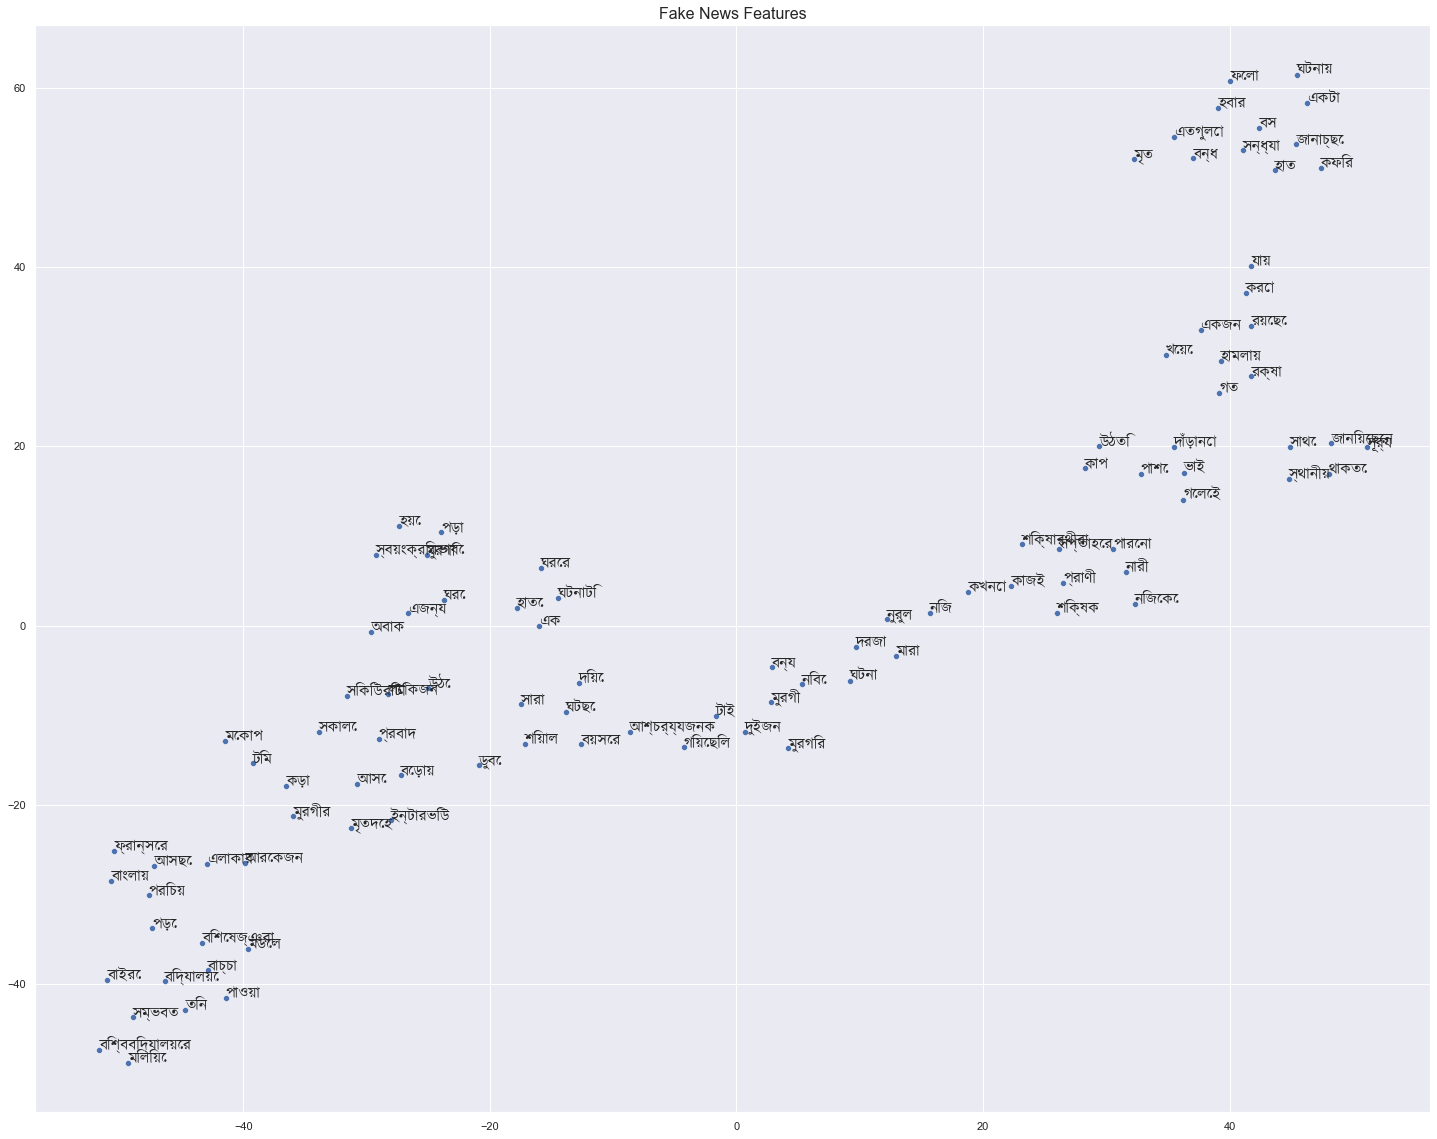

In [31]:
tsne_visulization(data=df_fake, shape=100, result=result_fake, title='Fake News Features')

### <span style='color:red'>Real Features</span>

In [32]:
%%time
type_real, shape_real, result_real=tsne_clustering(data=df_real, perplexity=15)
type_real, shape_real

Wall time: 1.61 s


(numpy.ndarray, (100, 2))

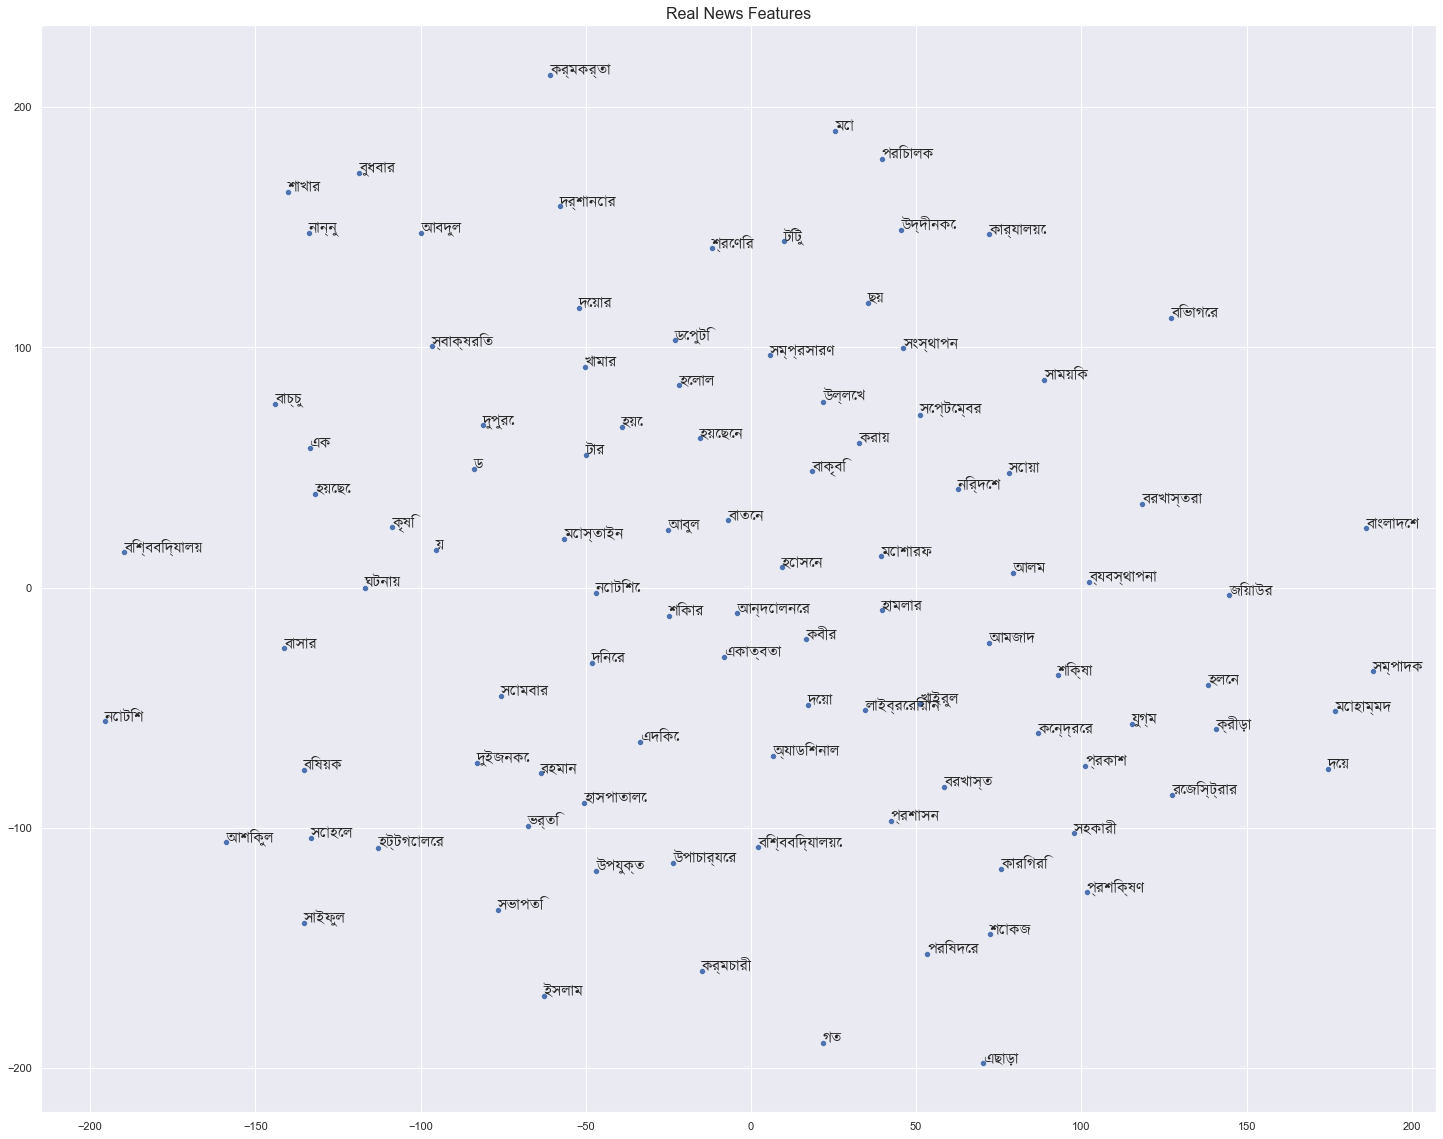

Wall time: 712 ms


In [33]:
%%time
tsne_visulization(data=df_real, shape=100, result=result_real, title='Real News Features')

In [34]:
import session_info
session_info.show()